<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/image_generation_two_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 668 (delta 211), reused 143 (delta 92), pack-reused 361
Receiving objects: 100% (668/668), 96.85 MiB | 26.80 MiB/s, done.
Resolving deltas: 100% (475/475), done.


In [2]:
import sys
import os
import numpy as np
from google.colab import drive

py_file_location = "/content/FineTuning"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_two_concepts as txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
13911/13911 [==============================] - 0s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


492466864/492466864 [==============================] - 7s 0us/step
49408
(49409, 768)
(49410, 768)
198180272/198180272 [==============================] - 1s 0us/step
[[TensorShape([49411, 768])], [], []]
136824240/136824240 [==============================] - 2s 0us/step
(768,)


In [10]:
### load stable diffusion class and placeholder token from textual_inversion.py
stable_diffusion = txt.stable_diffusion
placeholder_token_broccoli = txt.placeholder_token_broccoli
placeholder_token_emoji = txt.placeholder_token_emoji
placeholder_token_combined = txt.placeholder_token_combined

In [3]:
### choose where to load the weights from, either from your google drive or you load our pretrained weights
### make sure to insert the exact name of your weight.npy
drive.mount("/content/drive")
path = '/content/drive/MyDrive/weights_with_two_concepts.npy'
     


Mounted at /content/drive


In [7]:
###load the array of the weights of the text encoder from the training
text_encoder_weights = np.load(path, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(text_encoder_weights)
     


In [18]:
txt.percentage_emoji(0.3)

### insert your prompt here for just combining the images per prompt
prompt_combination = f" a {placeholder_token_broccoli} with {placeholder_token_emoji}"
### prompt for cincepts combined by interpolation
prompt_interpolation = f"A happy {placeholder_token_combined}. "

number = 2

25/25 [==============================] - 80s 2s/step


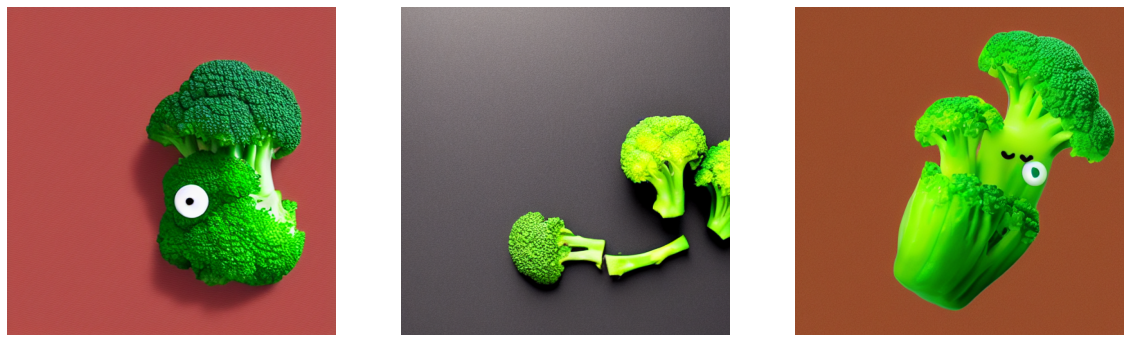

In [12]:
### generate some examples and plot them according to our new concept and prompts
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size=3, num_steps = 25, seed = 2234
)
txt.plot_images(generated)

25/25 [==============================] - 61s 2s/step


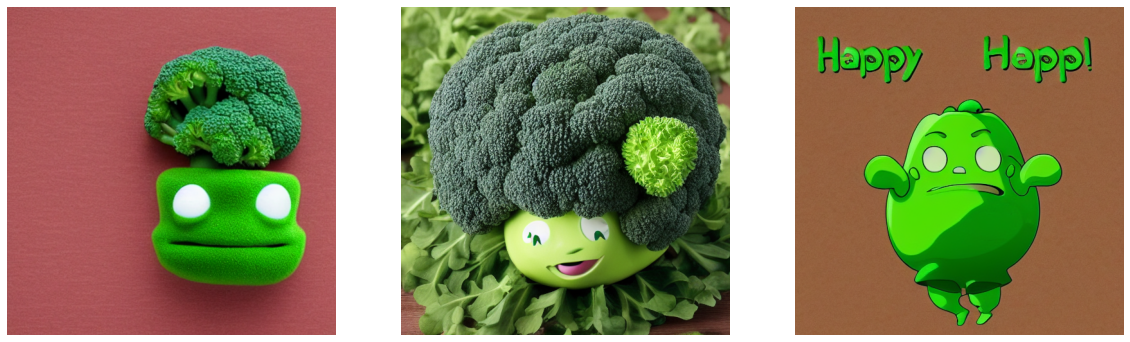

In [19]:
### generate some examples and plot them according to our new concept and prompts
generated = stable_diffusion.text_to_image(
    prompt_interpolation,batch_size=3, num_steps = 25, seed = 2234
)
txt.plot_images(generated)

In [20]:
### generate images and save them directly in your Google Drive
### where to store your images, you may have to create the folder "Images" first
drive_folder = '/content/drive/MyDrive/Images/'

###choose whether you want to use the interpolation prompt or the combined prompt
txt.image_generation(prompt_interpolation, drive_folder, number)

AttributeError: ignored

50/50 [==============================] - 150s 3s/step


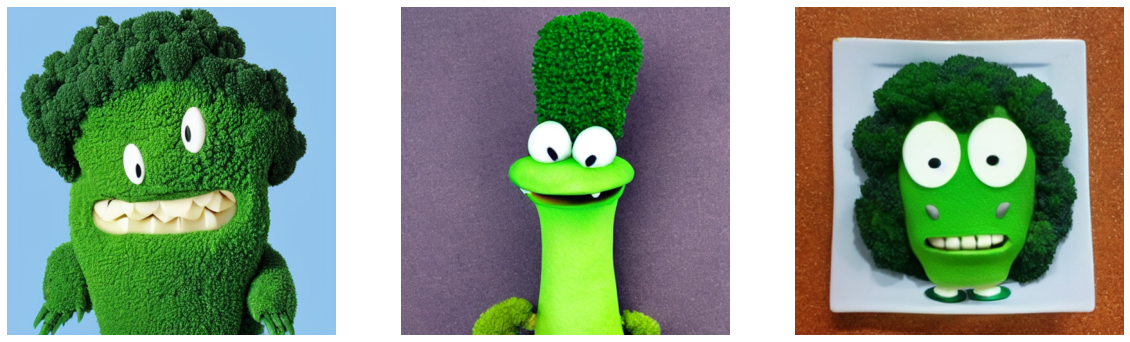

In [ ]:
### generate images and plot them here
### choose number of images to be generated by changing batch_size
### change seed if you want different images with same weights
generated = stable_diffusion.text_to_image(
    prompt , batch_size=3,  num_steps=30, seed=2332
)
txt.plot_images(generated)